### Genero una tabla de datos (dataframe) a partir de un archivo csv

In [1]:
import pandas as pd
ruta=''#'juega-tenis.csv'

df=pd.read_csv(ruta+'diabetes_preprocesado.csv')
df.head()

,Embarazos,Glucosa,Presion sanguinea,Grosor de piel,Insulina,IMC,Funcion pedigree diabetes,Edad,Diabetes
0,6 a 11,prediabetes,normal,medio,<141,obesidad,0 a 0.85,adulta,si
1,0 a 5,normal,normal,fino,<141,sobrepeso,0 a 0.85,joven,no
2,6 a 11,prediabetes,normal,fino,<141,normal,0 a 0.85,joven,si
3,0 a 5,normal,normal,fino,<141,sobrepeso,0 a 0.85,joven,no
4,0 a 5,normal,normal,medio,141 a 281,obesidad,>=1.64,joven,si


### Genero datos a priori a partir de una tabla de datos (dataframe)

In [2]:
import sys
sys.path.append("..")
from monk import core

apriori=core.Data(df)
apriori.attributes()

Embarazos
Glucosa
Presion sanguinea
Grosor de piel
Insulina
IMC
Funcion pedigree diabetes
Edad
Diabetes


### Genero datos con  evidencias

In [3]:
aposteriori1=apriori.new_scenario('Diabetes','si')
aposteriori2=apriori.new_scenario('Diabetes','no')
aposteriori3=apriori.new_scenario('Grosor de piel','grueso')
aposteriori4=apriori.new_scenario('Glucosa','prediabetes')
aposteriori5=apriori.new_scenario('Insulina','422 a 563')
                                   
aposteriori1.scenario()

Diabetes=si


### P('Glucosa'='normal') a priori

In [4]:
apriori.proba('Glucosa','normal')

0.7434895833333334


### Función de probabilidad a priori y con evidencias

In [5]:
apriori.proba_func('Glucosa')

normal         0.74349
prediabetes    0.25651
Name: Glucosa, dtype: float64


In [6]:
aposteriori1.proba_func('Glucosa')

prediabetes    0.503731
normal         0.496269
Name: Glucosa, dtype: float64


In [7]:
aposteriori2.proba_func('Glucosa')

normal         0.876
prediabetes    0.124
Name: Glucosa, dtype: float64


### Comparaciones entre escenarios

In [8]:
apriori.compare([aposteriori1],'Glucosa')

             a priori  Diabetes=si
Glucosa                           
normal        0.74349     0.496269
prediabetes   0.25651     0.503731


In [9]:
apriori.compare([aposteriori1,aposteriori2],'Glucosa')

             a priori  Diabetes=si  Diabetes=no
Glucosa                                        
normal        0.74349     0.496269        0.876
prediabetes   0.25651     0.503731        0.124


In [10]:
apriori.compare([aposteriori3],'Diabetes')

          a priori  Grosor de piel=grueso
Diabetes                                 
no        0.651042                    NaN
si        0.348958                    1.0


In [11]:
apriori.compare([aposteriori4],'Diabetes')

          a priori  Glucosa=prediabetes
Diabetes                               
no        0.651042             0.314721
si        0.348958             0.685279


In [12]:
apriori.compare([aposteriori5],'Diabetes')

          a priori  Insulina=422 a 563
Diabetes                              
no        0.651042            0.307692
si        0.348958            0.692308


### Gráficos de función de probabilidad a priori y con evidencias

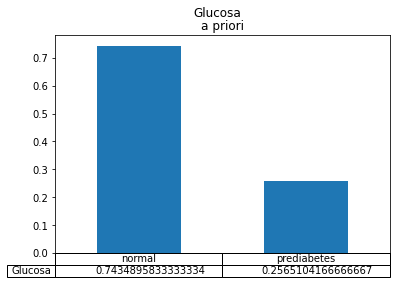

In [13]:
apriori.plot_proba_func('Glucosa')

In [14]:
#aposteriori1.plot_proba_func('Glucosa')

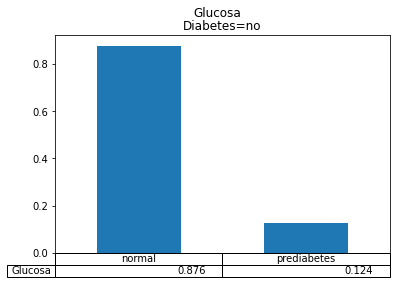

In [15]:
aposteriori2.plot_proba_func('Glucosa')

In [16]:
#apriori.plot_proba_func_attributes()

### Función de probabilidad a priori de todos los atributos

In [17]:
apriori.proba_func_attributes()

0 a 5     0.714844
6 a 11    0.255208
>=12      0.029948
Name: Embarazos, dtype: float64
normal         0.74349
prediabetes    0.25651
Name: Glucosa, dtype: float64
normal          0.733073
riesgoso        0.188802
hipertension    0.078125
Name: Presion sanguinea, dtype: float64
fino      0.781250
medio     0.217448
grueso    0.001302
Name: Grosor de piel, dtype: float64
<141         0.786458
141 a 281    0.156250
281 a 422    0.033854
422 a 563    0.016927
563 a 705    0.003906
>=705        0.002604
Name: Insulina, dtype: float64
obesidad     0.614583
sobrepeso    0.233073
normal       0.132812
bajo peso    0.019531
Name: IMC, dtype: float64
0 a 0.85       0.888021
0.85 a 1.64    0.100260
>=1.64         0.011719
Name: Funcion pedigree diabetes, dtype: float64
joven      0.747396
adulta     0.217448
anciana    0.035156
Name: Edad, dtype: float64
no    0.651042
si    0.348958
Name: Diabetes, dtype: float64


In [18]:
#evidencia1.proba_func_attributes()

In [19]:
#evidencia2.proba_func_attributes()

### Creación de archivos csv de las funciones de probabilidad a priori y con evidencia

In [20]:
apriori.export_proba_func('Glucosa',ruta+'proba-glucosa-apriori.csv') 

In [21]:
aposteriori1.export_proba_func('Glucosa',ruta+'proba-glucosa-evidencia(diabetes si).csv') 

In [22]:
aposteriori2.export_proba_func('Glucosa',ruta+'proba-glucosa-evidencia(diabetes no).csv') 

### Creación de archivos csv de las comparaciones entre escenarios

In [24]:
lista_datos=[aposteriori1,aposteriori2] 
apriori.export_compare(lista_datos,'Embarazos',ruta+'proba-embarazos.csv')
apriori.export_compare(lista_datos,'Glucosa',ruta+'proba-glucosa.csv')
apriori.export_compare(lista_datos,'Presion sanguinea',ruta+'proba-presion.csv')
apriori.export_compare(lista_datos,'Grosor de piel',ruta+'proba-grosor-piel.csv')
apriori.export_compare(lista_datos,'Insulina',ruta+'proba-insulina.csv')
apriori.export_compare(lista_datos,'IMC',ruta+'proba-IMC.csv')
apriori.export_compare(lista_datos,'Funcion pedigree diabetes',ruta+'proba-pedigri.csv')
apriori.export_compare(lista_datos,'Edad',ruta+'proba-Edad.csv')

In [25]:
apriori.export_compare([aposteriori3],'Diabetes',ruta+'proba-diabetes aposteriori3.csv')
apriori.export_compare([aposteriori4],'Diabetes',ruta+'proba-diabetes aposteriori4.csv')
apriori.export_compare([aposteriori5],'Diabetes',ruta+'proba-diabetes aposteriori5.csv')

### Comparaciones gráficas entre escenarios

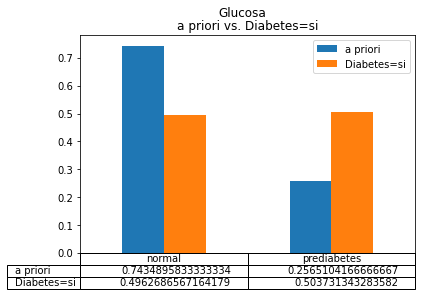

In [18]:
apriori.plot_compare([aposteriori1],'Glucosa')

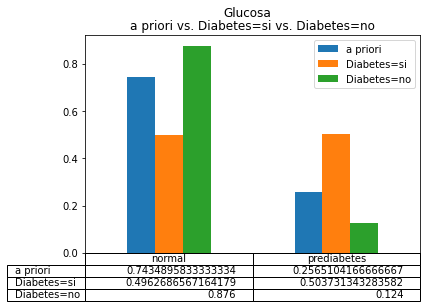

In [20]:
apriori.plot_compare([aposteriori1,aposteriori2],'Glucosa')

In [25]:
#aposteriori1.plot_compare(aposteriori2,'Glucosa')

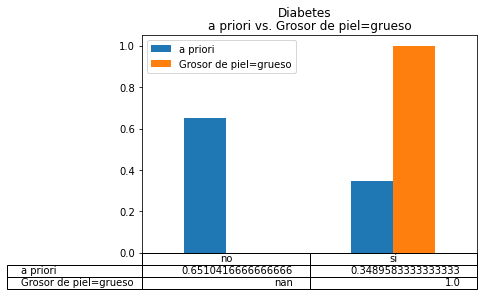

In [21]:
apriori.plot_compare([aposteriori3],'Diabetes')

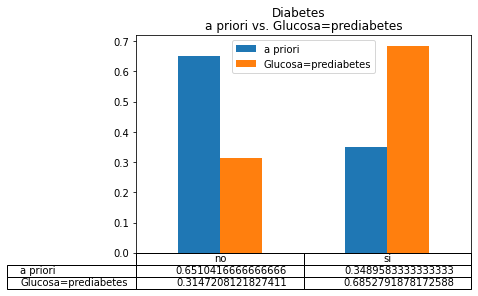

In [22]:
apriori.plot_compare([aposteriori4],'Diabetes')

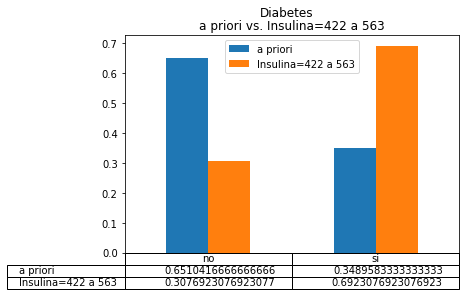

In [23]:
apriori.plot_compare([aposteriori5],'Diabetes')